In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium


# Tratamiento de datos

In [2]:
df = pd.read_excel("marketing_campaign.xlsx")
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.shape

(2240, 29)

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df_num = df._get_numeric_data().copy()

df_num.head(3)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0


In [8]:
df_cat = df.drop(df_num.columns, axis = 1)

df_cat.head(3)

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,2012-09-04
1,Graduation,Single,2014-03-08
2,Graduation,Together,2013-08-21


In [9]:
df_cat["year_customer"] = df_cat["Dt_Customer"].apply(lambda x : x.split("-")[0])

df_cat

,Education,Marital_Status,Dt_Customer,year_customer
0,Graduation,Single,2012-09-04,2012
1,Graduation,Single,2014-03-08,2014
2,Graduation,Together,2013-08-21,2013
3,Graduation,Together,2014-02-10,2014
4,PhD,Married,2014-01-19,2014
...,...,...,...,...
2235,Graduation,Married,2013-06-13,2013
2236,PhD,Together,2014-06-10,2014
2237,Graduation,Divorced,2014-01-25,2014
2238,Master,Together,2014-01-24,2014


In [10]:
df_cat.drop("Dt_Customer", axis = 1, inplace = True)

In [11]:
df_cat.head(3)

,Education,Marital_Status,year_customer
0,Graduation,Single,2012
1,Graduation,Single,2014
2,Graduation,Together,2013


In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)

df_num_imp = imputer.fit_transform(df_num)

df_num_imp

array([[5.5240e+03, 1.9570e+03, 5.8138e+04, ..., 3.0000e+00, 1.1000e+01,
        1.0000e+00],
       [2.1740e+03, 1.9540e+03, 4.6344e+04, ..., 3.0000e+00, 1.1000e+01,
        0.0000e+00],
       [4.1410e+03, 1.9650e+03, 7.1613e+04, ..., 3.0000e+00, 1.1000e+01,
        0.0000e+00],
       ...,
       [7.2700e+03, 1.9810e+03, 5.6981e+04, ..., 3.0000e+00, 1.1000e+01,
        0.0000e+00],
       [8.2350e+03, 1.9560e+03, 6.9245e+04, ..., 3.0000e+00, 1.1000e+01,
        0.0000e+00],
       [9.4050e+03, 1.9540e+03, 5.2869e+04, ..., 3.0000e+00, 1.1000e+01,
        1.0000e+00]])

In [13]:
df_num = pd.DataFrame(df_num_imp, columns = df_num.columns)

df_num.head(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
5,7446.0,1967.0,62513.0,0.0,1.0,16.0,520.0,42.0,98.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
6,965.0,1971.0,55635.0,0.0,1.0,34.0,235.0,65.0,164.0,50.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
7,6177.0,1985.0,33454.0,1.0,0.0,32.0,76.0,10.0,56.0,3.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
8,4855.0,1974.0,30351.0,1.0,0.0,19.0,14.0,0.0,24.0,3.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
9,5899.0,1950.0,5648.0,1.0,1.0,68.0,28.0,0.0,6.0,1.0,...,20.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [14]:
df_num.isnull().sum()/df_num.shape[0]

ID                     0.0
Year_Birth             0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [15]:
df_cat.head(3)

,Education,Marital_Status,year_customer
0,Graduation,Single,2012
1,Graduation,Single,2014
2,Graduation,Together,2013


In [16]:
df_num.head(3)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [17]:
df_cat.columns

Index(['Education', 'Marital_Status', 'year_customer'], dtype='object')

In [18]:
df_num.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

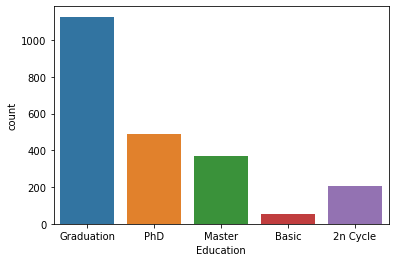

In [19]:
sns.countplot(x = df_cat["Education"])

plt.show()

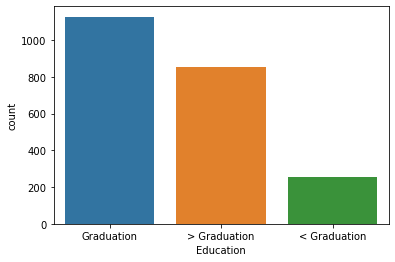

In [20]:
df_cat["Education"] = df_cat["Education"].replace({"Basic" : "< Graduation", "2n Cycle" : "< Graduation",
                                                   "Master" : "> Graduation", "PhD" : "> Graduation"})

sns.countplot(x = df_cat["Education"]);

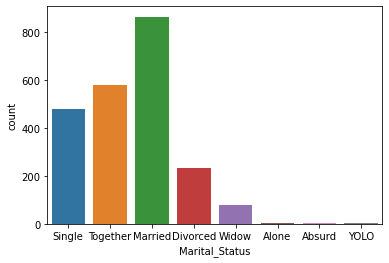

In [21]:
sns.countplot(x = df_cat["Marital_Status"])

plt.show()

In [22]:
df[df["Marital_Status"].isin(["Alone", "Absurd", "YOLO"])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,8,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,5,1,0,0,0,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,6,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


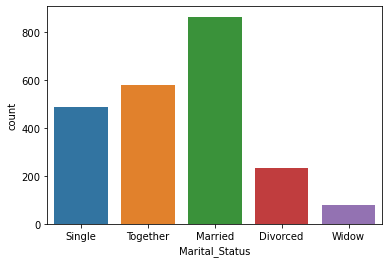

In [23]:
df_cat["Marital_Status"] = df_cat["Marital_Status"].replace({"Alone" : "Single", "Absurd" : "Single", "YOLO" : "Single"})

sns.countplot(x = df_cat["Marital_Status"]);

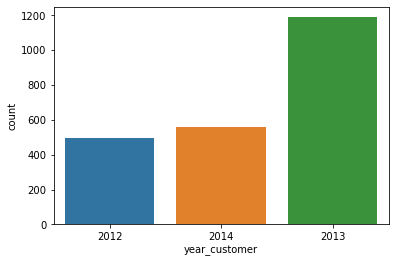

In [24]:
sns.countplot(x = df_cat["year_customer"])

plt.show()

In [25]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["Marital_Status"])], axis = 1)

df_cat

,Education,Marital_Status,year_customer,Divorced,Married,Single,Together,Widow
0,Graduation,Single,2012,0,0,1,0,0
1,Graduation,Single,2014,0,0,1,0,0
2,Graduation,Together,2013,0,0,0,1,0
3,Graduation,Together,2014,0,0,0,1,0
4,> Graduation,Married,2014,0,1,0,0,0
...,...,...,...,...,...,...,...,...
2235,Graduation,Married,2013,0,1,0,0,0
2236,> Graduation,Together,2014,0,0,0,1,0
2237,Graduation,Divorced,2014,1,0,0,0,0
2238,> Graduation,Together,2014,0,0,0,1,0


In [26]:
df_cat.drop("Marital_Status", axis = 1, inplace = True)

df_cat.head(3)

,Education,year_customer,Divorced,Married,Single,Together,Widow
0,Graduation,2012,0,0,1,0,0
1,Graduation,2014,0,0,1,0,0
2,Graduation,2013,0,0,0,1,0


In [27]:
from sklearn.preprocessing import LabelEncoder


Education_labelEncoding = LabelEncoder()


Education_labelEncoding.fit(df_cat["Education"].values)


Education = Education_labelEncoding.transform(df_cat["Education"].values)

Education

array([2, 2, 2, ..., 2, 1, 1])

In [28]:
df_cat["Education"] = Education
df_cat.head(3)

,Education,year_customer,Divorced,Married,Single,Together,Widow
0,2,2012,0,0,1,0,0
1,2,2014,0,0,1,0,0
2,2,2013,0,0,0,1,0


In [29]:
df = pd.concat([df_num, df_cat], axis = 1)

df

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_CostContact,Z_Revenue,Response,Education,year_customer,Divorced,Married,Single,Together,Widow
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,3.0,11.0,1.0,2,2012,0,0,1,0,0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,3.0,11.0,0.0,2,2014,0,0,1,0,0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,3.0,11.0,0.0,2,2013,0,0,0,1,0
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,3.0,11.0,0.0,2,2014,0,0,0,1,0
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,3.0,11.0,0.0,1,2014,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,3.0,11.0,0.0,2,2013,0,1,0,0,0
2236,4001.0,1946.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,3.0,11.0,0.0,1,2014,0,0,0,1,0
2237,7270.0,1981.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,3.0,11.0,0.0,2,2014,1,0,0,0,0
2238,8235.0,1956.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,3.0,11.0,0.0,1,2014,0,0,0,1,0


In [30]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Education', 'year_customer', 'Divorced',
       'Married', 'Single', 'Together', 'Widow'],
      dtype='object')

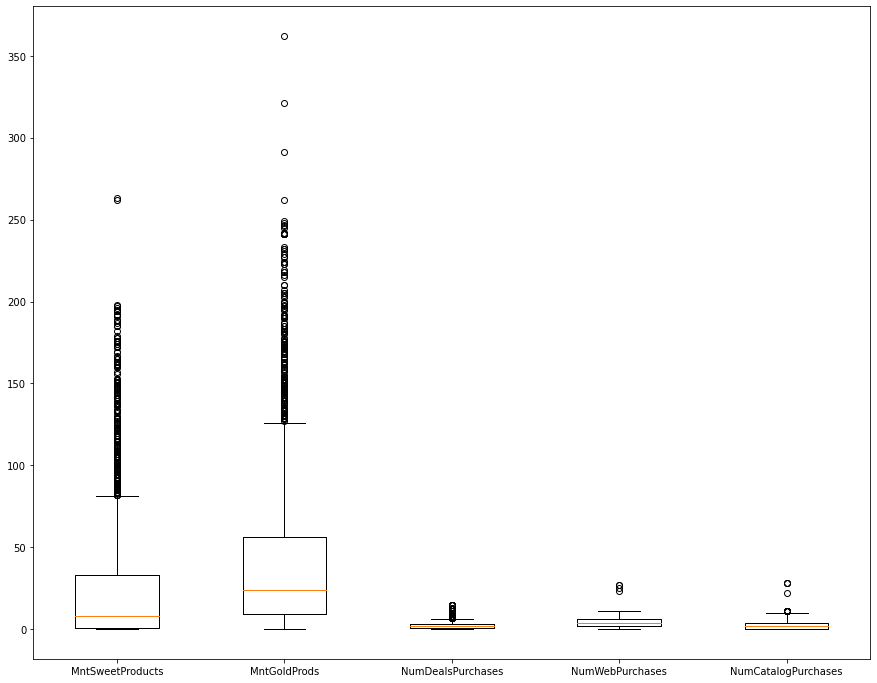

In [31]:
#income 2
fig = plt.figure(figsize = (15, 12))
data = df.iloc[:, 10:15]
etiquetas = df.columns[10:15]

plt.boxplot(x = data, labels = etiquetas)
plt.show()

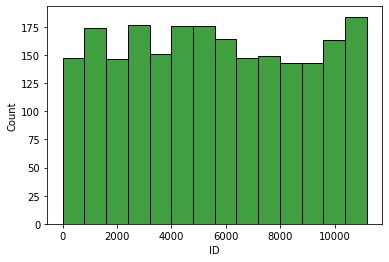

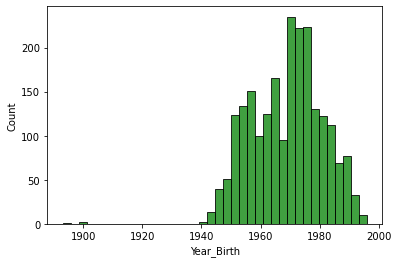

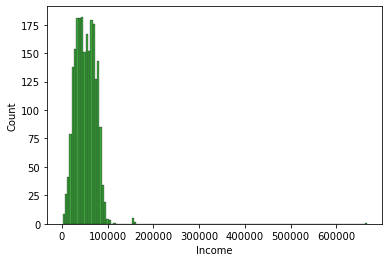

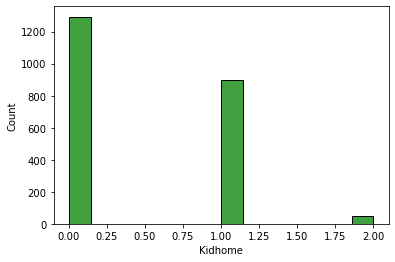

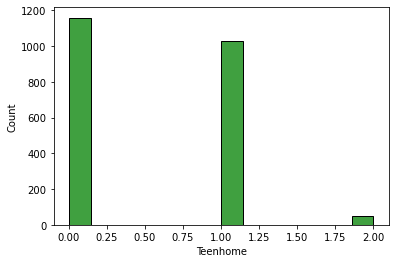

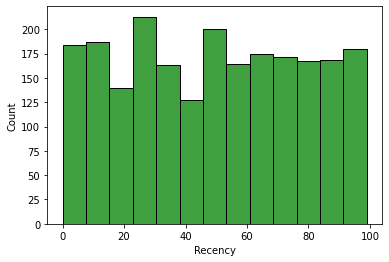

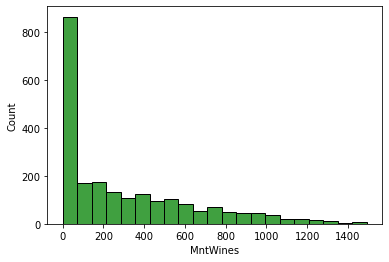

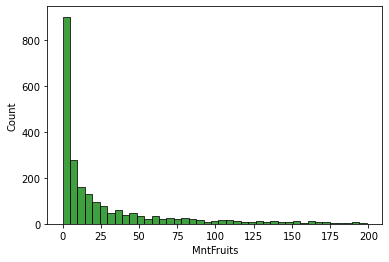

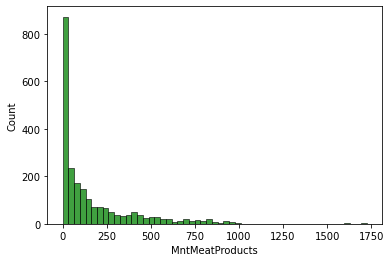

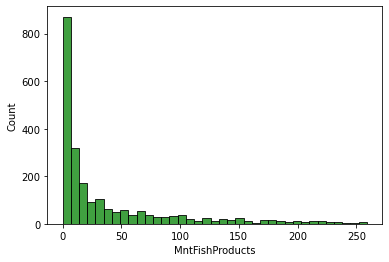

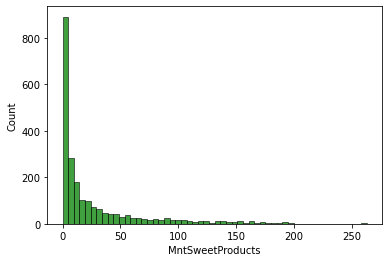

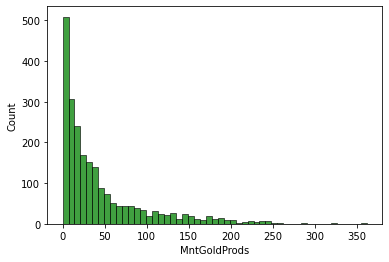

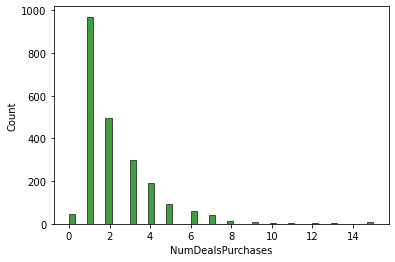

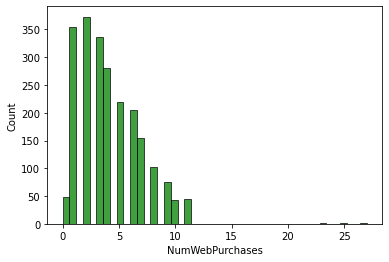

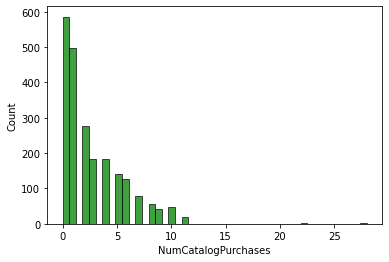

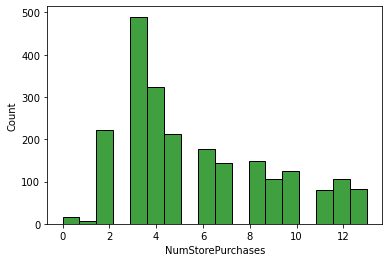

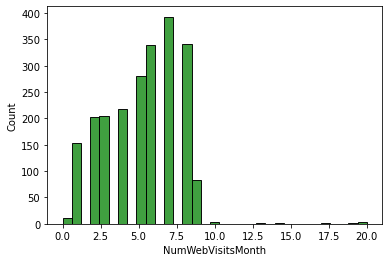

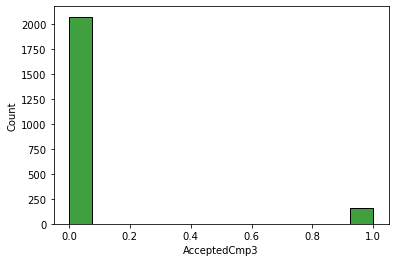

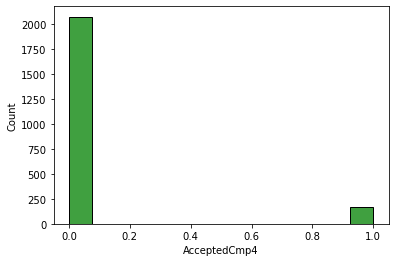

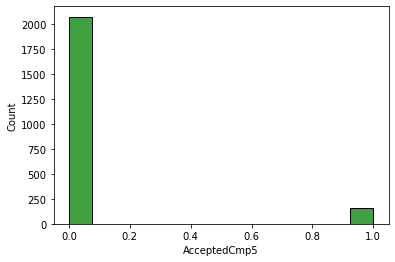

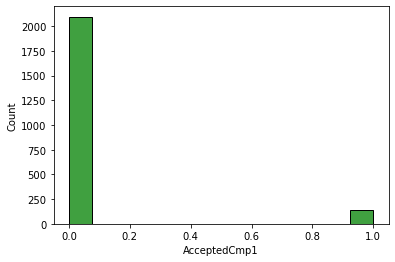

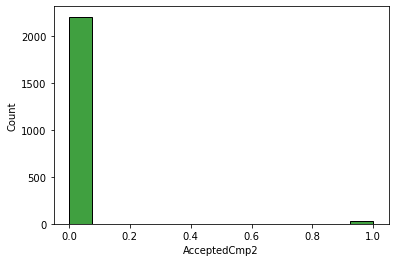

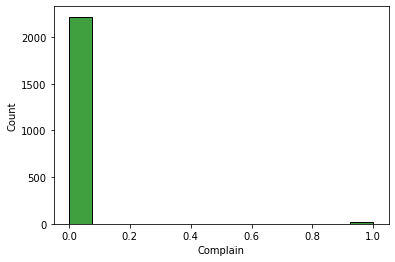

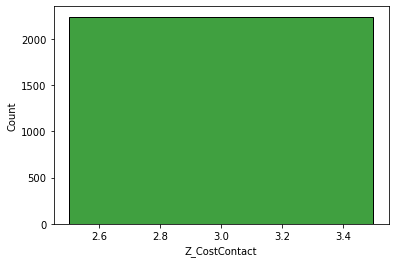

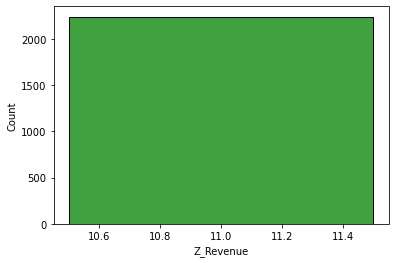

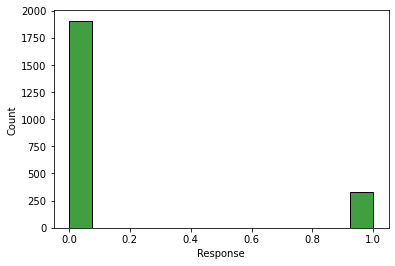

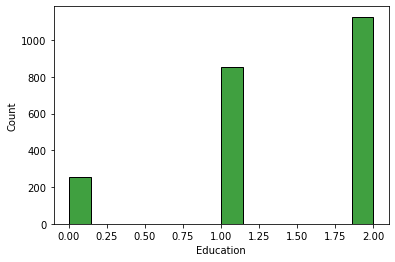

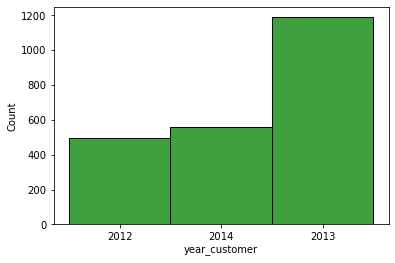

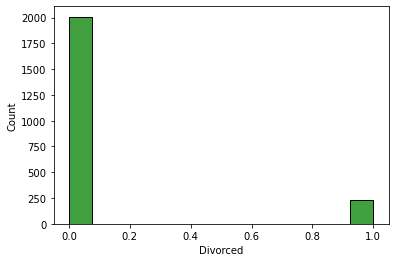

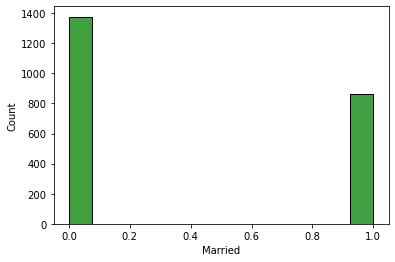

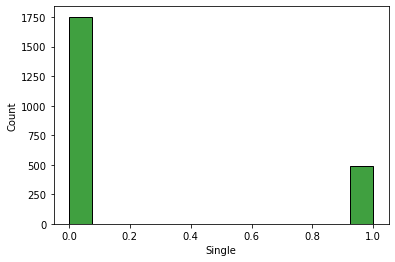

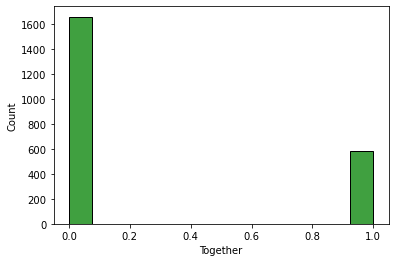

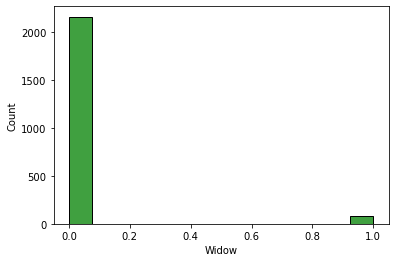

In [32]:
for i in df.columns:
    sns.histplot(df[i], color = "green")
    plt.show()

In [33]:
df.drop(["ID", "Z_CostContact", "Z_Revenue"], axis = 1, inplace = True)

df.head(3)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Education,year_customer,Divorced,Married,Single,Together,Widow
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,...,0.0,0.0,1.0,2,2012,0,0,1,0,0
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,...,0.0,0.0,0.0,2,2014,0,0,1,0,0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,...,0.0,0.0,0.0,2,2013,0,0,0,1,0


In [34]:
df = df[df["Year_Birth"] > 1940]

df = df[df["Income"] < 100000]

df = df[df["MntMeatProducts"] < 1050]

df = df[df["MntSweetProducts"] < 200]

df = df[df["MntGoldProds"] < 275]

df = df[df["NumCatalogPurchases"] < 11.5]

df = df[df["NumWebVisitsMonth"] < 9]

df = df[df["NumDealsPurchases"] < 9]

df = df[df["NumStorePurchases"] > 1.25]

df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Education,year_customer,Divorced,Married,Single,Together,Widow
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,...,0.0,0.0,1.0,2,2012,0,0,1,0,0
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,...,0.0,0.0,0.0,2,2014,0,0,1,0,0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,...,0.0,0.0,0.0,2,2013,0,0,0,1,0
3,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,...,0.0,0.0,0.0,2,2014,0,0,0,1,0
4,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,...,0.0,0.0,0.0,1,2014,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,...,0.0,0.0,0.0,2,2013,0,1,0,0,0
2236,1946.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,1,2014,0,0,0,1,0
2237,1981.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,12.0,...,0.0,0.0,0.0,2,2014,1,0,0,0,0
2238,1956.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,...,0.0,0.0,0.0,1,2014,0,0,0,1,0


# Feature Selection

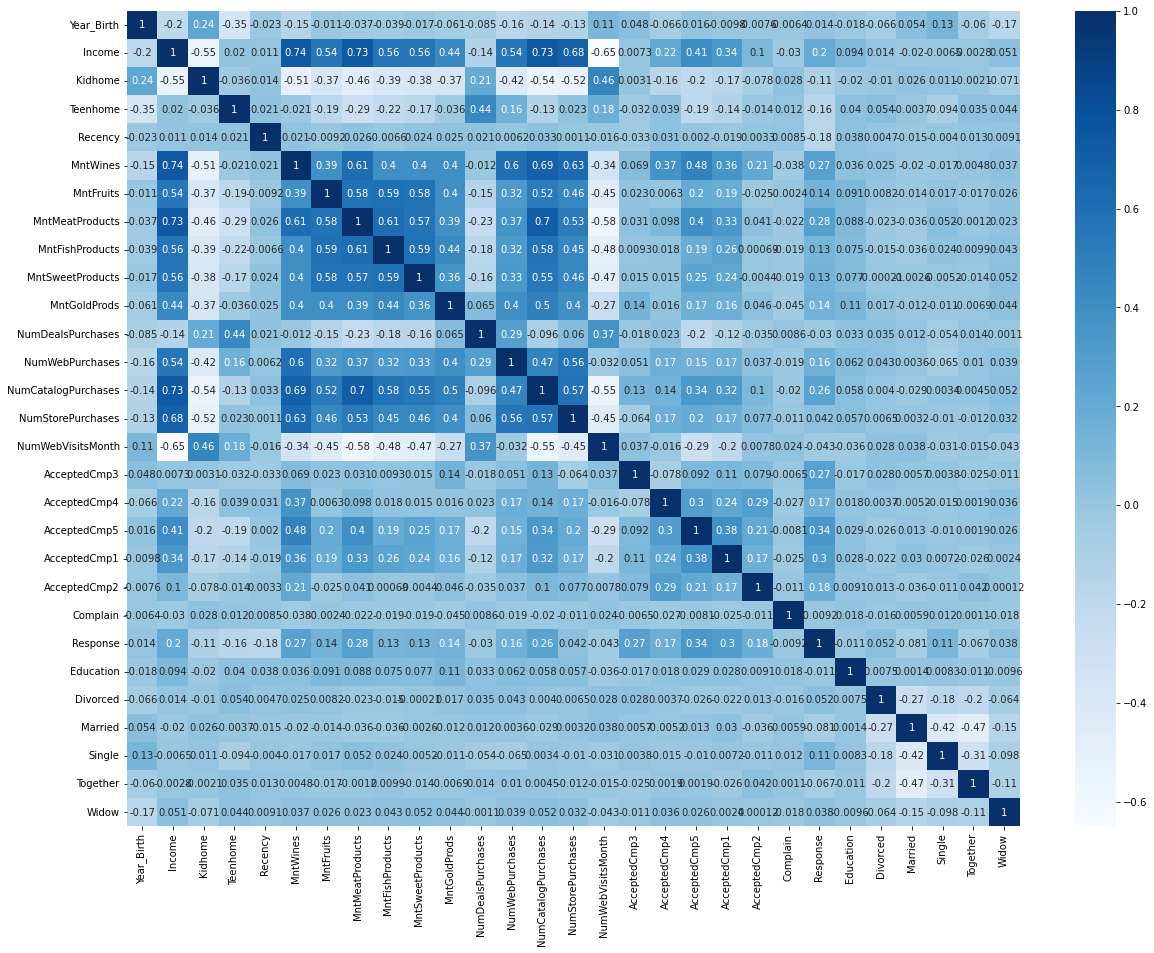

In [35]:
fig = plt.figure(figsize = (20, 15))

sns.heatmap(data = df.corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [36]:
df_class = df["Response"].copy()

# Como ya tenemos la columna "objetivo" en otra variable vamos a eliminarla del DataFrame original
df.drop("Response", axis = 1, inplace = True)

In [37]:
X = np.asarray(df)
y = np.asarray(df_class)

Feature ranking:
1. feature 4 (0.066725): Year_Birth
2. feature 18 (0.063525): Income
3. feature 16 (0.061412): Kidhome
4. feature 7 (0.057349): Teenhome
5. feature 19 (0.054520): Recency
6. feature 13 (0.048390): MntWines
7. feature 5 (0.045986): MntFruits
8. feature 1 (0.044491): MntMeatProducts
9. feature 23 (0.041614): MntFishProducts
10. feature 14 (0.041207): MntSweetProducts
11. feature 9 (0.040001): MntGoldProds
12. feature 10 (0.038652): NumDealsPurchases
13. feature 0 (0.038610): NumWebPurchases
14. feature 6 (0.037579): NumCatalogPurchases
15. feature 15 (0.037534): NumStorePurchases
16. feature 12 (0.036602): NumWebVisitsMonth
17. feature 8 (0.035804): AcceptedCmp3
18. feature 11 (0.031384): AcceptedCmp4
19. feature 22 (0.028594): AcceptedCmp5
20. feature 3 (0.024327): AcceptedCmp1
21. feature 26 (0.022270): AcceptedCmp2
22. feature 27 (0.019013): Complain
23. feature 25 (0.017820): Education
24. feature 24 (0.015055): year_customer
25. feature 17 (0.014591): Divorced
26. f

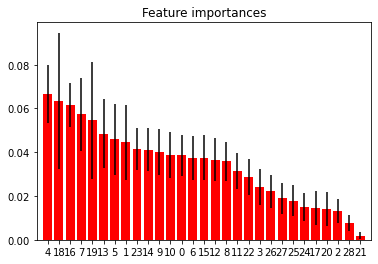

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df.columns[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [39]:
# Tras comprobar el mapa de calor, y el feature selection,
# no parece existir una fuerte correlación entre unas pocas variables,
# por lo que utilizaremos todas las variables en conjunto.


# Selección de modelos

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Modelos de Clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
# Normalización de datos

from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.29090909, 0.55477283, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23636364, 0.42556175, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.43636364, 0.70240039, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.72727273, 0.54209713, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.67645738, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.23636364, 0.49704745, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (1679, 29), y_train: (1679,)
X_test: (420, 29),  y_test: (420,)


In [43]:
def hecho_encasa(vecinos,radio):
    
    model = KNeighborsClassifier(n_neighbors = vecinos)

    cercanos=model.fit(X_train, y_train)
    yhat1 = model.predict(X_test)

    print("KNeighborsClassifier: ROC AUC:", roc_auc_score(y_test, yhat1))
    

    print ("*"*100)
    
    model = RadiusNeighborsClassifier(radius = radio, outlier_label = "most_frequent")
    radios_vecinos=model.fit(X_train, y_train)
    yhat2 = model.predict(X_test)

    print("RadiusNeighborsClassifier: ROC AUC:", roc_auc_score(y_test, yhat2))
    
    print ("*"*100)
    
    model = NearestCentroid(metric = "euclidean")
    centroides=model.fit(X_train, y_train)
    yhat3 = model.predict(X_test)

    print("NearestCentroid: ROC AUC:", roc_auc_score(y_test, yhat3))
    
    print ("*"*100) 
    
    model = GaussianNB()
    bayes = model.fit(X_train, y_train)
    yhat4 = model.predict(X_test)

    print("GaussianNB: ROC AUC:", roc_auc_score(y_test, yhat4))
    
    print ("*"*100)  
    
    model = DecisionTreeClassifier()
    arbol_decision = model.fit(X_train, y_train)
    yhat5 = model.predict(X_test)
    
    print("DecisionTreeClassifier: ROC AUC:", roc_auc_score(y_test, yhat5))
    
    print ("*"*100) 
    
    model = RandomForestClassifier()
    bosque = model.fit(X_train, y_train)
    yhat6 = model.predict(X_test)
    
    print("RandomForestClassifier: ROC AUC:", roc_auc_score(y_test, yhat6))
    
    print ("*"*100)
    
    model = LogisticRegression()
    logistic = model.fit(X_train, y_train)
    yhat7 = model.predict(X_test)
    
    print("LogisticRegression: ROC AUC:", roc_auc_score(y_test, yhat7))
    
    print ("*"*100)
    

In [44]:
hecho_encasa(1, 0.8)

KNeighborsClassifier: ROC AUC: 0.6839930404523706
****************************************************************************************************
RadiusNeighborsClassifier: ROC AUC: 0.5328403653762506
****************************************************************************************************
NearestCentroid: ROC AUC: 0.7637378570392924
****************************************************************************************************
GaussianNB: ROC AUC: 0.7598231114977527
****************************************************************************************************
DecisionTreeClassifier: ROC AUC: 0.7001594896331738
****************************************************************************************************
RandomForestClassifier: ROC AUC: 0.663041902276352
****************************************************************************************************
LogisticRegression: ROC AUC: 0.7461215021023634
*****************************************************

In [45]:
list_ROC_AUC = list()

for k in range(1, X_train.shape[0]):
    
    # Modelo
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    # Predicciones
    yhat = model.predict(X_test)
    
    # Metricas
    ROC_AUC_neighbors = roc_auc_score(y_test, yhat)
    list_ROC_AUC.append([k, ROC_AUC_neighbors])
    
    

KeyboardInterrupt: 

In [ ]:
list_ROC_AUC = np.array(list_ROC_AUC)

In [ ]:
mejor_indice = np.argmax(list_ROC_AUC[:, 1])
print(mejor_indice)
list_ROC_AUC[mejor_indice]

In [ ]:
list_ROC_AUC2 = list()

for radio in np.arange(0, 1, 0.001):
    
    # Modelo
    model = RadiusNeighborsClassifier(radius = radio, outlier_label = "most_frequent")
    model.fit(X_train, y_train)
        
    try:

        # Predicciones
        yhat = model.predict(X_test)

        # Metricas
        ROC_AUC_neighbors = roc_auc_score(y_test, yhat)
        list_ROC_AUC2.append([radio, ROC_AUC_neighbors])
        
    except:
        
        pass

In [ ]:
list_ROC_AUC2 = np.array(list_ROC_AUC2)

In [ ]:
list_ROC_AUC2

In [ ]:
mejor_indice = np.argmax(list_ROC_AUC2[:, 1])
print(mejor_indice)
list_ROC_AUC2[mejor_indice]

In [ ]:
%%time

loo = LeaveOneOut()
yhat = list()

# EL for va a realizar 150 iteraciones porque es un total de 150 patrones

for train_index, test_index in loo.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Modelo
    model = NearestCentroid(metric = "euclidean")
    model.fit(X_train, y_train)
    
    # Prediccion
    yhat1 = model.predict(X_test)
    yhat.append(yhat1)

print("ROC AUC:", roc_auc_score(y, yhat)) 